In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os
import re

## 1.加载模型

In [2]:
interpreter = tf.lite.Interpreter(model_path="model_tflite/model_1015.tflite")

In [3]:
interpreter.allocate_tensors()

## 2.获取输入

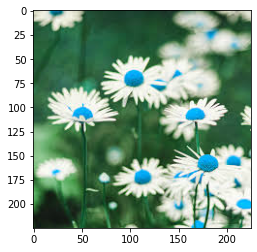

In [4]:
img = cv2.imread("test/daisy.jpeg")

plt.imshow(img)

plt.show()

In [5]:
# 将图片缩放到224，224
test_img=cv2.resize(img,(224,224))
# 将图片转化为浮点数
test_img = tf.keras.preprocessing.image.img_to_array(test_img)
# 将图片扩维
test_img = np.expand_dims(test_img,axis=0)
# 将图片带入预处理
test_img = tf.keras.applications.mobilenet_v2.preprocess_input(test_img)

## 3.准备输入

In [6]:
input_details = interpreter.get_input_details()

In [7]:
input_details 

[{'name': 'mobilenetv2_1.00_224_input',
  'index': 1,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [8]:
out_details = interpreter.get_output_details()

In [9]:
out_details

[{'name': 'Identity',
  'index': 0,
  'shape': array([1, 5], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [10]:
interpreter.set_tensor(input_details[0]['index'],test_img)

## 4.推理

In [11]:
interpreter.invoke()

## 5.解析结果

In [12]:
result = interpreter.get_tensor(out_details[0]["index"])

In [13]:
result

array([[1.0000000e+00, 6.0727334e-10, 6.8346217e-22, 1.4739803e-22,
        6.2800357e-15]], dtype=float32)

In [14]:
max_result = np.argmax(result)

In [15]:
labels_dir = "model_tflite/labels.txt"

In [19]:
labels=[]
with open(labels_dir,'r') as file_to_read:
    while True:
        line = file_to_read.readline()
        if not line:
            break
        line = line.strip('\n')
        labels.append(line)

In [20]:
labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [21]:
labels[np.argmax(result)]

'daisy'

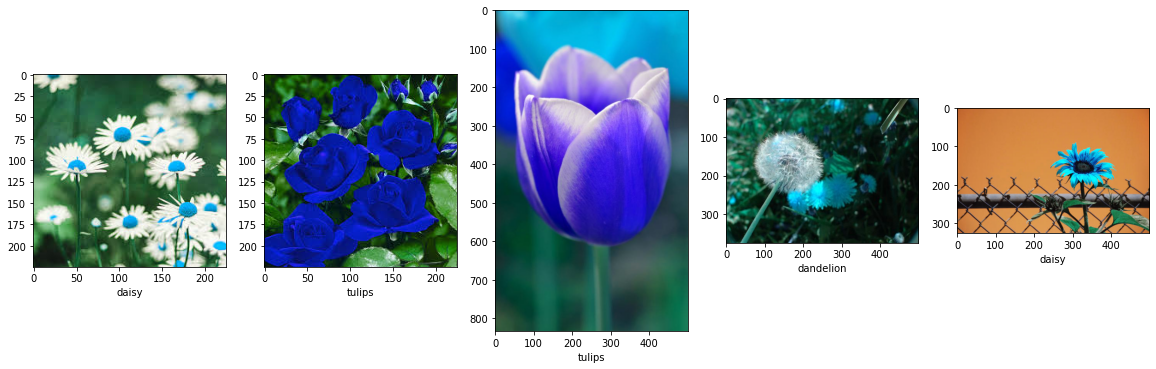

In [27]:
path_test ="test/"

i=0
plt.figure(figsize=(20,20))
for fn in os.listdir(path_test):
    if re.match(r'\S*\.?jpg|\S*\.?png|\S*\.?jpeg',fn):
        filename = os.path.join(path_test,fn)
        test_pic=cv2.imread(filename)
        
        plt.subplot(1,5,i+1)
        plt.imshow(test_pic)
        
        # 图片预处理部分
        test_pic=cv2.resize(test_pic,(224,224))
        x = tf.keras.preprocessing.image.img_to_array(test_pic)
        x = np.expand_dims(x, axis=0)
        x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    
        # 模型加载
        interpreter = tf.lite.Interpreter(model_path="model_tflite/model_1015.tflite")
        interpreter.allocate_tensors()
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()
    
        # 模型推理
        interpreter.set_tensor(input_details[0]['index'],x)
        interpreter.invoke()
        tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
        # 显示结果
        plt.xlabel(labels[np.argmax(tflite_results)] )
        
        i=i+1
        if(i>=5): break
    
plt.show()    